# Like a new bike, taking Keras out for a ride.

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
# Start with white noise

data = np.random.random((1000, 1))
labels = np.random.random((1000, 1))

print(data.shape, labels.shape)
dim = data.shape[1]
dim

(1000, 1) (1000, 1)


1

In [3]:
# Do an MLP with three hidden layers with 32, 64, and 32 neurons respectively as regression.

model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=dim))
model.add(Dense(units=64, activation='relu', input_dim=dim))
model.add(Dense(units=32, activation='relu', input_dim=dim))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy', 'mse'])
model.fit(data, labels, epochs=20, batch_size=100, verbose=2)

Epoch 1/20
0s - loss: 0.3134 - acc: 0.0000e+00 - mean_squared_error: 0.3134
Epoch 2/20
0s - loss: 0.1891 - acc: 0.0000e+00 - mean_squared_error: 0.1891
Epoch 3/20
0s - loss: 0.1175 - acc: 0.0000e+00 - mean_squared_error: 0.1175
Epoch 4/20
0s - loss: 0.1046 - acc: 0.0000e+00 - mean_squared_error: 0.1046
Epoch 5/20
0s - loss: 0.0964 - acc: 0.0000e+00 - mean_squared_error: 0.0964
Epoch 6/20
0s - loss: 0.0899 - acc: 0.0000e+00 - mean_squared_error: 0.0899
Epoch 7/20
0s - loss: 0.0857 - acc: 0.0000e+00 - mean_squared_error: 0.0857
Epoch 8/20
0s - loss: 0.0837 - acc: 0.0000e+00 - mean_squared_error: 0.0837
Epoch 9/20
0s - loss: 0.0832 - acc: 0.0000e+00 - mean_squared_error: 0.0832
Epoch 10/20
0s - loss: 0.0824 - acc: 0.0000e+00 - mean_squared_error: 0.0824
Epoch 11/20
0s - loss: 0.0826 - acc: 0.0000e+00 - mean_squared_error: 0.0826
Epoch 12/20
0s - loss: 0.0826 - acc: 0.0000e+00 - mean_squared_error: 0.0826
Epoch 13/20
0s - loss: 0.0827 - acc: 0.0000e+00 - mean_squared_error: 0.0827
Epoch 14

In [4]:
data_test = np.random.random((1000,1))
predictions = model.predict(data_test)

In [5]:
# Look at means, variances, and MSE

print(labels.mean(), predictions.mean())
print(labels.var(), predictions.var())
((labels - predictions)**2).mean()

0.49989019205 0.492355
0.082460859043 0.000299429


0.082819300081699992

In [6]:
# As expected, it's best shot is the average value with virtually no variance.

predictions[0:25]

array([[ 0.48459384],
       [ 0.47159147],
       [ 0.52217305],
       [ 0.52007473],
       [ 0.48030216],
       [ 0.47472093],
       [ 0.46720454],
       [ 0.49479514],
       [ 0.47087759],
       [ 0.48012063],
       [ 0.51041555],
       [ 0.47385672],
       [ 0.47832862],
       [ 0.4746758 ],
       [ 0.47800314],
       [ 0.47087339],
       [ 0.47404283],
       [ 0.48061693],
       [ 0.47695288],
       [ 0.49562374],
       [ 0.47685316],
       [ 0.49444503],
       [ 0.495249  ],
       [ 0.52036035],
       [ 0.47163796]], dtype=float32)

In [7]:
# A usual suspect.

import pandas as pd
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';') 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [8]:
# Create dummies and stack.

red['type'] = 1
white['type'] = 0
wines = red.append(white, ignore_index=True)

In [9]:
# Look at the result.

wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [10]:
# Use oldspeak to segment the data as numpy arrays, which Keras needs.  (It can't do everything!)  Do train/test split.  
# X are features and y is label.

from sklearn.model_selection import train_test_split

X = wines.ix[:, 0:11]
y = np.ravel(wines.type)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1492)

/Users/timothysavage/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [11]:
print(y.mean(), y_test.mean(), y_train.mean())

0.246113590888 0.246153846154 0.24609375


In [12]:
# Preprocessing as a commodity.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Basic Keras structure.

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(11,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
# Useful summary of network structure, in particular the list of total parameters being estimated.
# I can guess where the non-trainable params is going ;).

model.output_shape
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile and estimate.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=1)

Epoch 1/20
4352/4352 [==============================] - 2s - loss: 0.3484 - acc: 0.8594     
Epoch 2/20
4352/4352 [==============================] - 1s - loss: 0.0557 - acc: 0.9899     
Epoch 3/20
4352/4352 [==============================] - 1s - loss: 0.0359 - acc: 0.9933     
Epoch 4/20
4352/4352 [==============================] - 1s - loss: 0.0292 - acc: 0.9945     
Epoch 5/20
4352/4352 [==============================] - 1s - loss: 0.0255 - acc: 0.9952     
Epoch 6/20
4352/4352 [==============================] - 1s - loss: 0.0227 - acc: 0.9959     
Epoch 7/20
4352/4352 [==============================] - 1s - loss: 0.0210 - acc: 0.9956     
Epoch 8/20
4352/4352 [==============================] - 1s - loss: 0.0195 - acc: 0.9963     
Epoch 9/20
4352/4352 [==============================] - 1s - loss: 0.0180 - acc: 0.9972     
Epoch 10/20
4352/4352 [==============================] - 1s - loss: 0.0171 - acc: 0.9972     
Epoch 11/20
4352/4352 [==============================] - 1s - loss: 0

In [16]:
# Create predictions as integer-valued numpy arrays.

y_pred = model.predict(X_test).round().astype(np.int)

In [17]:
# Look at first five observations.

print(y_pred[:5])
print(y_test[:5])

[[1]
 [0]
 [0]
 [0]
 [1]]
[1 0 0 0 1]


In [18]:
# Standard measures of performance.
# First the accuracy rate on the test or validation set.

from sklearn.metrics import accuracy_score
print('Accuracy Rate: %f' % accuracy_score(y_test, y_pred))

Accuracy Rate: 0.993939


In [19]:
# Next the confusion matrix, which shows correct and incorrect classification on the test set.

from sklearn.metrics import confusion_matrix
print('Confusion matrix:\n%s' % confusion_matrix(y_test, y_pred))

Confusion matrix:
[[1615    2]
 [  11  517]]


In [20]:
# Next a classification report.

from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      1617
          1       1.00      0.98      0.99       528

avg / total       0.99      0.99      0.99      2145



In [21]:
# Other stuff

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [22]:
x_train.shape[1], x_train.max(), y_train

(28, 255, array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

In [23]:
x_norm_train = x_train.astype(np.float32)/255
y_norm_train = y_train.astype(np.float32)/255

In [24]:
x_norm_train.shape[1]

28

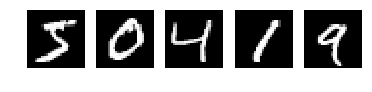

Training labels: [5 0 4 1 9]


In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

num_digits = 5
for i in range(num_digits):
    plt.subplot(1, num_digits, i+1)
    plt.imshow(x_train[i], cmap='Greys_r')
    plt.axis('off')
plt.show()
print('Training labels: %s' % (y_train[0:num_digits],))